Here need to re-write the triangle algorithm so that each new triangle isn't defined against bottom line.  

In [1]:
%matplotlib inline
from TriangleFunctions import *

Now make recursive_draw to reflect the required changes for the recursive drawing.

In [2]:
def drawRecursive(steps, startPoint, points):
    """steps: the number of iterations to go around triangle
    startPoint: the point to start the process from within the triangle
    points: the set of points that define the outer triangle
    points_to_draw: a [start, end] pair that determines the number of steps to graph"""
    
    current_point = startPoint
    # track visited points for graphing
    visited_points = [startPoint]
    
    # define lines of triangle.  Of form [m, b]
    # bottom line is on x axis so don't have to draw it.
    l1 = findFunc(points[0], points[1])
    l2 = findFunc(points[1], points[2])
    l3 = findFunc(points[2], points[0])
    
    # define perpindicular functions.  Returns m'
    lp1 = pFunc(l1[0])
    lp2 = pFunc(l2[0])
    lp3 = pFunc(l3[0])
    
    # start painting loop for n steps
    for i in range(0, steps):

        # for each perpendicular line, define the exact function that passes through the current point to find next step
        lOne = [lp1, newB(lp1, current_point)]
        inter1 = inter(l1, lOne)

        lTwo = [lp2, newB(lp2, current_point)]
        inter2 = inter(l2, lTwo)

        lThree = [lp3, newB(lp3, current_point)]
        inter3 = inter(l3, lThree)


        dist1 = dist(current_point, inter1)
        dist2 = dist(current_point, inter2)
        dist3 = dist(current_point, inter3)

        # use largest to pick the longest distance to travel within triangle
        largest = heapq.nlargest(3, [dist1, dist2, dist3])
        cur_largest = largest[0]
        next_indx = largest.index(cur_largest) + 1
        next_largest = largest[next_indx]

        # prevent program from drawing outside of triangle
        while(True):
            if((cur_largest == dist1) and (inter1[1] > points[1][1])):
                cur_largest = largest[next_indx]
            if((cur_largest == dist2) and (inter2[1] > points[1][1])):
                cur_largest = largest[next_indx]
            if((cur_largest == dist3) and (inter3[1] > points[1][1])):
                cur_largest = largest[next_indx]
            else:
                break

        # if two distances are the same pick a random one to follow
        if(cur_largest == next_largest):
            # make a random choice between the two
            largest_pick = random.choice([cur_largest, next_largest])

            if(largest_pick == dist1):
                current_point = inter1
                visited_points.append(current_point)

            if(largest_pick == dist2):
                current_point = inter2
                visited_points.append(current_point)

            if(largest_pick == dist3):
                current_point = inter3
                visited_points.append(current_point)

        if(cur_largest != next_largest):   
            # if all different distances and within rules, move to the new point
            if(cur_largest == dist1):
                current_point = inter1
                visited_points.append(current_point)
            if(cur_largest == dist2):
                current_point = inter2
                visited_points.append(current_point)
            if(cur_largest == dist3):
                current_point = inter3
                visited_points.append(current_point)
    


    return visited_points[-3:]

In [8]:
points = return_points(60, 60, [4, .5])
points

((0, 0), (2.1443375672974065, 3.7141016151377535), [4, 0.5])

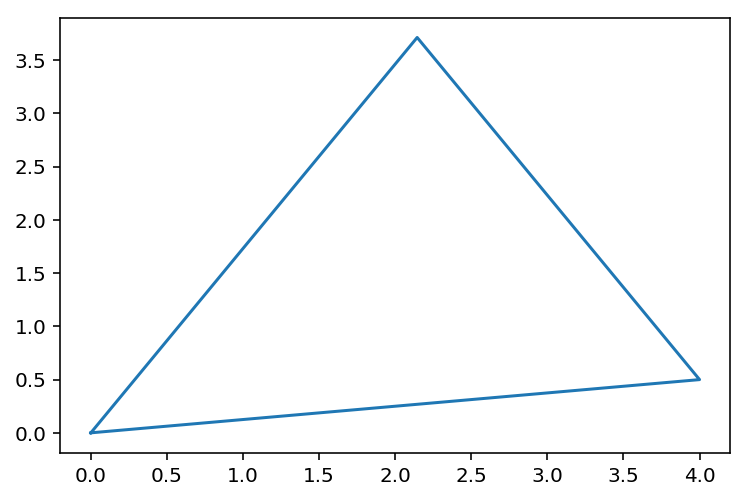

In [9]:
xT = [points[0][0], points[1][0], points[2][0], points[0][0]]
yT = [points[0][1], points[1][1], points[2][1], points[0][1]]

fig, ax = plt.subplots(dpi=144)
ax.plot(xT, yT)

In [10]:
points = drawRecursive(110, [0, 0], points)
points

[(1.7241006942664663, 0.21551258678330829),
 (3.554211837017904, 1.2721277476977866),
 (1.4394004324371585, 2.493114681417771)]

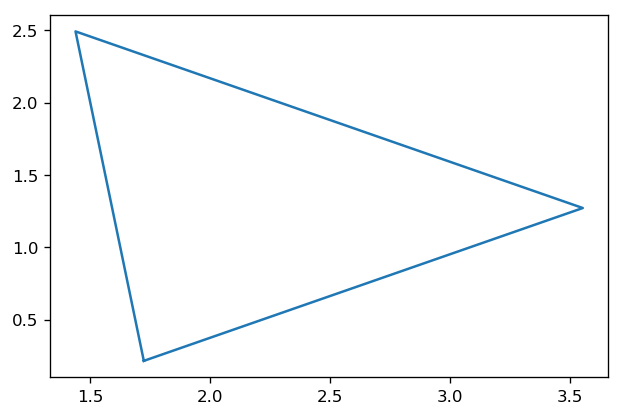

In [11]:
xT = [points[0][0], points[1][0], points[2][0], points[0][0]]
yT = [points[0][1], points[1][1], points[2][1], points[0][1]]

fig, ax = plt.subplots(dpi=120)
ax.plot(xT, yT)

In [16]:
points = drawRecursive(100, [2, 2], points)
points

[(1.7241006942664663, 0.21551258678330854),
 (1.7241006942664663, 0.2155125867833082),
 (1.7241006942664663, 0.21551258678330854)]

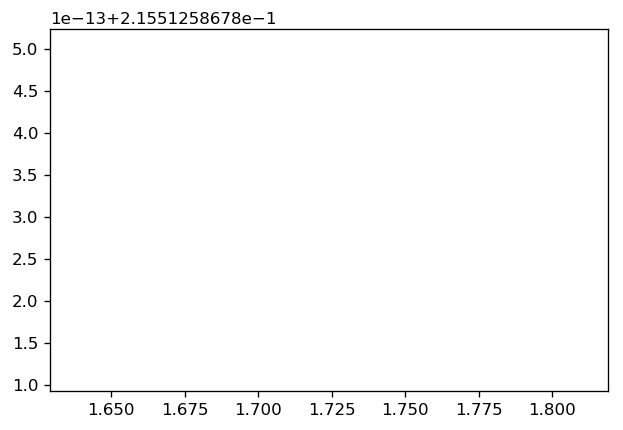

In [17]:
xT = [points[0][0], points[1][0], points[2][0], points[0][0]]
yT = [points[0][1], points[1][1], points[2][1], points[0][1]]

fig, ax = plt.subplots(dpi=120)
ax.plot(xT, yT)

In [ ]:
# plot the points of the stepping process
x = []
for i in visited_points[-25:]:
    x.append(i[0])

y = []
for i in visited_points[-25:]:
    y.append(i[1])

# plot the outer triangle
xT = [points[0][0], points[1][0], points[2][0], points[0][0]]
yT = [points[0][1], points[1][1], points[2][1], points[0][1]]

fig, ax = plt.subplots(dpi=144)
ax.plot(xT, yT)
ax.plot(x, y)
#ax.scatter(x, y)
plt.xlim(-.5, (points[2][0]+.5))
plt.ylim(-.5, (points[1][1]+.5))
plt.gca().set_aspect('equal', adjustable='box')

plt.draw

In [12]:
eq_triangle = return_points(60, 60, [4, .1])

a0 = drawRecursive(100, [0, 0], eq_triangle)
a0

[(1.352953928100783, 2.3433849437704453),
 (1.4106568911380828, 0.03526642227845207),
 (3.380694684176878, 1.1726682724031363)]

In [14]:
a1 = drawRecursive(100, a0[0], a0)
a1

KeyboardInterrupt: 